<h1>Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης</h1>
<h2>Εργαστηριακή Άσκηση Εαρινό Εξάμηνο 2023-2024</h2>
<h3>Στεργιόπουλος Γεώργιος<br>1083861<br>Τμήμα: ΗΜΤΥ</h3>

<b><h2>Ερώτημα 2</h2></b>
<b><h3>Classification</h3></b>
Σε αυτό το ερώτημα πρέπει να εκπαδεύσουμε 3 ταξινομητές βασιζόμενοι σε:
<ul>
<li>Neural Networks</li>
<li>Random Forest</li>
<li>Bayesian Networks</li>
</ul>

<h2>Συλλογή Δεδομένων</h2>
<i>Αν καταθέσω 1 notebook, δεν χρειάζεται αυτό</i>

In [14]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe():
    df=pd.DataFrame()
    for i in testers:
        tester_df = pd.read_sql_query(dataOfTester(i), conn)
        if(i=='S015' or i=='S021'):
            tester_df=tester_df.drop(columns=['index'])
        if(i=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
        df=pd.concat([df,tester_df],ignore_index=True)
    return df

df=pd.DataFrame()
df=createDataframe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.4+ MB


<h2>Αγνόηση Χρονοσειρών</h2>


In [15]:
reports=[]
accuracies=[]
trainingscores=[]

<h3>Dataframe χώρις timestamp</h3>
Εδώ θα εκπαιδεύσουμε τα μοντέλα μας και θα τα διαχειριστούμε αγνοώντας τελείως οτι αυτά αποτελούν χρονικές σειρές. Θα κάνουμε classfication  σαν να είναι απλα, μεμονωμένα δεδομένα.

In [16]:
df_notime=pd.DataFrame()
df_notime=df.drop(columns=['timestamp'])
df_notime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   back_x   float64
 1   back_y   float64
 2   back_z   float64
 3   thigh_x  float64
 4   thigh_y  float64
 5   thigh_z  float64
 6   label    int64  
dtypes: float64(6), int64(1)
memory usage: 345.1 MB


<h3>Χωρισμός σε Test/Train και Κανονικοποιήση δεδομένων</h3>
Είναι πρακτικό και βοηθάει με βάση την θεωρία να εκπαιδεύσουμε τα μοντέλα μας σε κανονικοποιημένα δεδομένα.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df_notime.drop(columns=['label'])
Y=df_notime['label']
#dont forget to check with stratify=Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

<h3>Neural Network Classifier</h3>

<h4>Training</h4>

In [18]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=1000,activation='tanh',random_state=42,early_stopping=True)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', early_stopping=True, max_iter=1000,
              random_state=42)

<h4>Results and Metrics</h4>

In [22]:
from sklearn.metrics import accuracy_score,classification_report
mlppredicts=mlp.predict(X_test)
mlp_report=classification_report(y_test,mlppredicts)
mlp_accur=accuracy_score(y_test,mlppredicts)
mlp_score=mlp.score(X_train,y_train)
print("MLP report:",mlp_report,"MLP accuracy:",mlp_accur,"MLP training:",mlp_score)

MLP report:               precision    recall  f1-score   support

           1       0.76      0.85      0.80    239594
           2       0.90      0.83      0.86     58550
           3       0.43      0.17      0.24     51051
           4       0.33      0.05      0.08     15304
           5       0.34      0.02      0.04     13441
           6       0.75      0.89      0.81    148170
           7       0.99      1.00      0.99    580473
           8       1.00      1.00      1.00     85900
          13       0.79      0.85      0.82     78847
          14       0.59      0.51      0.55     11086
         130       0.49      0.42      0.45      8275
         140       0.59      0.27      0.37      1575

    accuracy                           0.88   1292266
   macro avg       0.66      0.57      0.59   1292266
weighted avg       0.86      0.88      0.86   1292266
 MLP accuracy: 0.8780491013460077 MLP training: 0.8782935859542795


<h3>Random Forest Classifier</h3>

<h4>Training</h4>

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=42)

<h4>Results and Metrics</h4>

In [24]:
rfpredicts=rf.predict(X_test)
rf_report=classification_report(y_test,rfpredicts)
rf_accur=accuracy_score(y_test,rfpredicts)
rf_score=rf.score(X_train,y_train)
print("RF report:",rf_report,"RF accuracy:",rf_accur,"RF training:",rf_score)

RF report:               precision    recall  f1-score   support

           1       0.78      0.89      0.83    239594
           2       0.92      0.89      0.90     58550
           3       0.55      0.31      0.40     51051
           4       0.65      0.23      0.34     15304
           5       0.57      0.09      0.15     13441
           6       0.85      0.89      0.87    148170
           7       1.00      1.00      1.00    580473
           8       1.00      1.00      1.00     85900
          13       0.82      0.89      0.85     78847
          14       0.73      0.60      0.66     11086
         130       0.66      0.49      0.56      8275
         140       0.71      0.48      0.57      1575

    accuracy                           0.90   1292266
   macro avg       0.77      0.65      0.68   1292266
weighted avg       0.89      0.90      0.89   1292266
 RF accuracy: 0.9016471840936773 RF training: 0.9999920681934169


<h3>Naive Bayes Classifier</h3>

<h4>Training</h4>

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

<h4>Results and Metrics</h4>

In [26]:
predicts_gnb=gnb.predict(X_test)
gnb_report=classification_report(y_test,predicts_gnb)
gnb_accur=accuracy_score(y_test,predicts_gnb)
gnb_score=gnb.score(X_train,y_train)
print("GNB estim report: \n",gnb_report,'\n',"GNB estim accuracy:",gnb_accur,'\n',"GNB training:",gnb_score)

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GNB estim report: 
               precision    recall  f1-score   support

           1       0.65      0.53      0.59    239594
           2       0.62      0.62      0.62     58550
           3       0.15      0.10      0.12     51051
           4       0.00      0.00      0.00     15304
           5       0.00      0.00      0.00     13441
           6       0.55      0.93      0.69    148170
           7       0.97      0.98      0.97    580473
           8       0.92      0.98      0.95     85900
          13       0.57      0.54      0.56     78847
          14       0.34      0.11      0.17     11086
         130       0.00      0.00      0.00      8275
         140       0.16      0.01      0.01      1575

    accuracy                           0.78   1292266
   macro avg       0.41      0.40      0.39   1292266
weighted avg       0.75      0.78      0.76   1292266
 
 GNB estim accuracy: 0.7750215512905237 
 GNB training: 0.7750775672646217


<h3>Compare the Classifiers</h3>

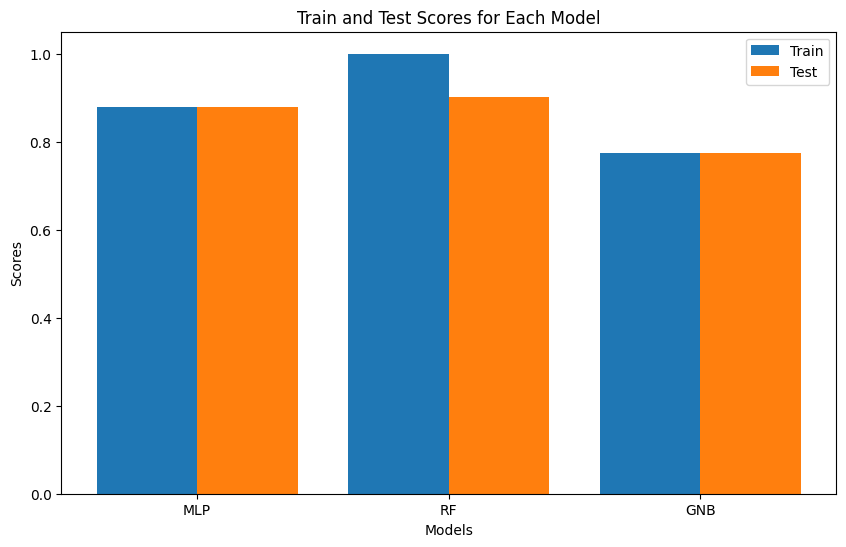

In [28]:
from matplotlib import pyplot as plt
import numpy as np
models=['MLP','RF','GNB']
accuracies=[mlp_accur,rf_accur,gnb_accur]
trainingscores=[mlp_score,rf_score,gnb_score]

# Plot
plt.figure(figsize=(10, 6))
x=np.arange(len(accuracies))

plt.bar(x-0.2, trainingscores,0.4, label='Train')
plt.bar(x+0.2, accuracies,0.4,label='Test')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores for Each Model')
plt.legend()
plt.show()

